In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_pickle("./pickle_file/Weather_Dataset_Preprocessed.pkl")
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Visibility (km),Daily Summary,Month,Apparent Temperature (C)
0,0.685536,-0.354531,-0.257951,0.792748,1.309107,1.201254,-0.728497,7.388889
1,0.685536,-0.354531,-0.270141,0.639470,1.309107,1.201254,-0.728497,7.227778
2,0.226376,-0.354531,-0.267819,0.792748,1.100806,1.201254,-0.728497,9.377778
3,0.685536,-0.354531,-0.381594,0.486192,1.309107,1.201254,-0.728497,5.944444
4,0.226376,-0.354531,-0.332833,0.486192,1.309107,1.201254,-0.728497,6.977778


### Function

In [3]:
# function to get accuracy and f1-score for various models
def get_scores(y_test,y_pred):
    rmse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print("Mean Squared Error :",rmse)
    print("r2:",r2)
    return rmse,r2
    

In [4]:
# Function to perform PCA and visualize the results
def PCA_2(X_test,Y_test,Y_pred):
    pca = PCA(n_components=1)
    principalComponent = pca.fit_transform(X_test)
    #Visualizing data (Original data versus the algorithm)
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(principalComponent,Y_test, marker="+",c='#1f77b4')
    plt.plot(principalComponent,Y_pred,c='r')
    #plt.xlim(-5,5)
    plt.show()
    
    
    

In [5]:
# Function to visualize ytest versus ypred
def comparison (Y_test,Y_pred):
    fig = plt.figure(figsize=(10, 6))
    plt.title("Actual versus Predicted output")
    plt.scatter(Y_test,Y_pred, marker="+",c='#1f77b4')
    plt.plot(Y_test,Y_test,c='r', label="Ideal case where actual output = predicted")
    plt.legend(loc="upper left")
    plt.xlabel("ytest")
    plt.ylabel("y_pred")
    #plt.xlim(-5,5)
    plt.show()

### Dividing data into Test and Train Data

In [6]:
x=df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [7]:
x

array([[ 0.68553574, -0.35453109, -0.25795124, ...,  1.30910749,
         1.20125367, -0.72849667],
       [ 0.68553574, -0.35453109, -0.27014132, ...,  1.30910749,
         1.20125367, -0.72849667],
       [ 0.22637571, -0.35453109, -0.2678194 , ...,  1.10080599,
         1.20125367, -0.72849667],
       ...,
       [ 0.68553574, -0.35453109,  1.0550949 , ...,  1.37468389,
         0.72123121,  0.72098456],
       [ 0.68553574, -0.35453109,  1.00111025, ...,  1.37468389,
         0.72123121,  0.72098456],
       [ 0.68553574, -0.35453109,  0.88791662, ...,  1.23581623,
         0.72123121,  0.72098456]])

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
ytest.shape

(28781,)

In [10]:
#Creating empty lists for r2 scores and rmse
r2_list=[]
rmse_list=[]

## Implementing Multiple Linear Regression

In [11]:
lin_model=LinearRegression()

In [12]:
lin_model=lin_model.fit(xtrain,ytrain)

In [13]:
y_pred=lin_model.predict(xtest)

In [14]:
print("Evaluating Linear Regression ")
print("-"*10)
r2_lin,rmse_lin = get_scores(ytest,y_pred)

Evaluating Linear Regression 
----------
Mean Squared Error : 1.553822058253939
r2: 0.9864446650078776


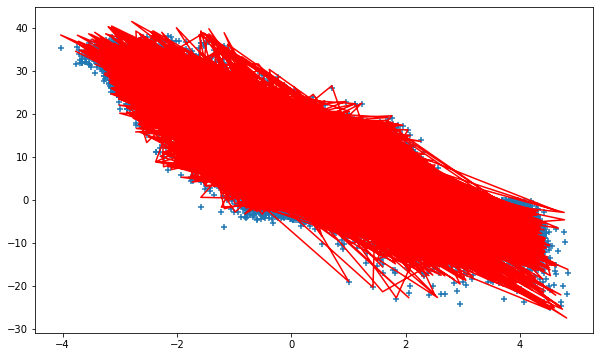

In [15]:
#Performing PCA to convert multiple features to a single principle feature and then visualizing the actual data versus our algorithm's plot
PCA_2(xtest,ytest,y_pred)
#principalDf = pd.DataFrame(data = principalComponent, columns = ['principal component 1'])

In [16]:
#targetdf=pd.DataFrame(ytest)
#finalDf = pd.concat([principalDf,targetdf], axis = 1)
#finalDf

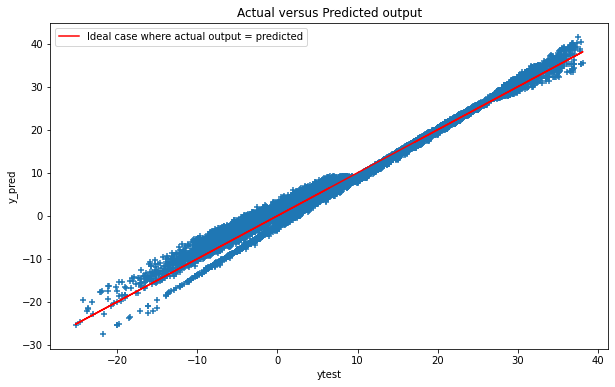

In [17]:
#Visualizing ytest versus ypred
comparison(ytest,y_pred)

In [18]:
# Comparing predicted versus actual outputs
#import seaborn as sns
#sns.regplot(x=ytest, y=y_pred, ci=None,marker="+",scatter_kws={"color": "black"}, line_kws={"color": "red"})
# plot ypred and ytest by showing a line. 

## Implementing Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(xtrain,ytrain)
y_pred_rf=rf.predict(xtest)

In [20]:
print("Evaluating Random Forest Regressor ")
print("-"*10)
r2_rf,rmse_rf = get_scores(ytest,y_pred_rf)

Evaluating Random Forest Regressor 
----------
Mean Squared Error : 0.7653517060867115
r2: 0.9933231744859795


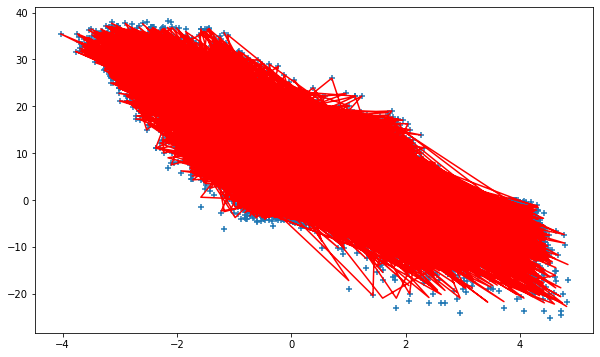

In [21]:
#Visualizing the actual data points versus our algorithm's plot
PCA_2(xtest,ytest,y_pred_rf)

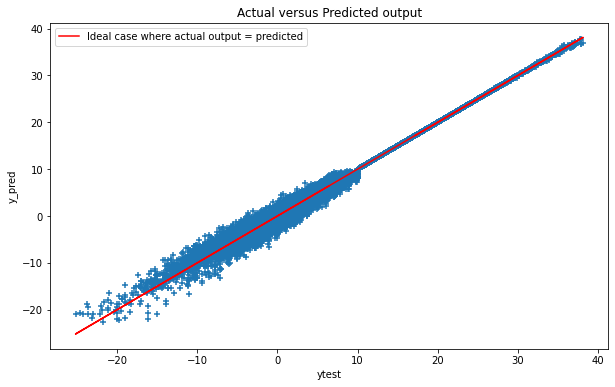

In [22]:
#Visualizing ytest versus ypred
comparison(ytest,y_pred_rf)

## Implementing Gradient Boosting Ensemble

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100,random_state=0)
gb.fit(xtrain,ytrain)
y_pred_gb=gb.predict(xtest)

In [24]:
print("Evaluating Gradient Boosting Regressor ")
print("-"*10)
r2_gb,rmse_gb = get_scores(ytest,y_pred_gb)

Evaluating Gradient Boosting Regressor 
----------
Mean Squared Error : 0.953005529610072
r2: 0.9916861077273378


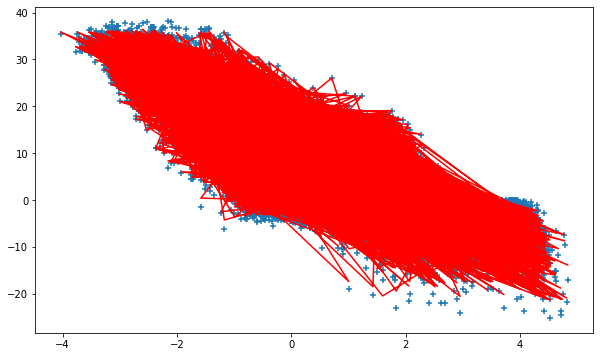

In [25]:
#Visualizing the actual data points versus our algorithm's plot
PCA_2(xtest,ytest,y_pred_gb)

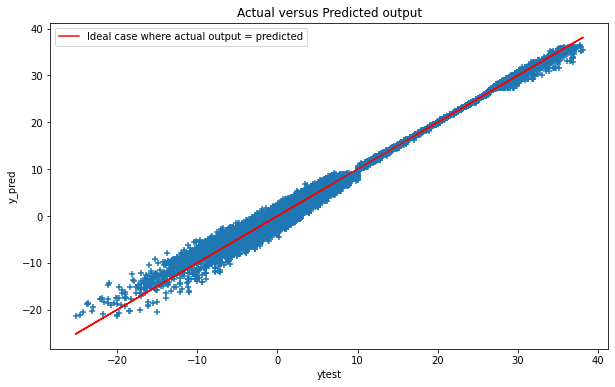

In [26]:
#Visualizing ytest versus ypred
comparison(ytest,y_pred_gb)

## Implementing XGBRegressor

In [27]:
import xgboost as xg
xgbr = xg.XGBRegressor(objective ='reg:linear',n_estimators = 100)
xgbr.fit(xtrain,ytrain)
y_pred_xgbr=xgbr.predict(xtest)

[15:03:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
print("Evaluating XGBRegressor ")
print("-"*10)
r2_xgbr,rmse_xgbr = get_scores(ytest,y_pred_xgbr)

Evaluating XGBRegressor 
----------
Mean Squared Error : 0.9530215783764632
r2: 0.9916859677200548


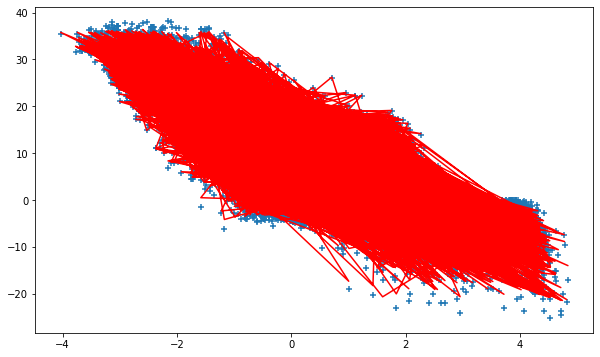

In [29]:
#Visualizing the actual data points versus our algorithm's plot
PCA_2(xtest,ytest,y_pred_xgbr)

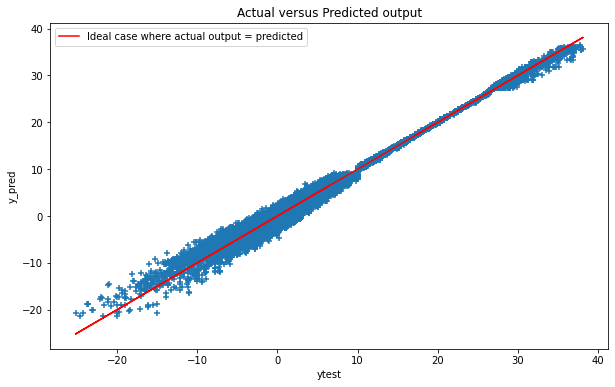

In [30]:
#Visualizing ytest versus ypred
comparison(ytest,y_pred_xgbr)

## Evaluation Results for all models

In [31]:
r2_list.append(r2_lin)
r2_list.append(r2_rf)
r2_list.append(r2_gb)
r2_list.append(r2_xgbr)
rmse_list.append(rmse_lin)
rmse_list.append(rmse_rf)
rmse_list.append(rmse_gb)
rmse_list.append(rmse_xgbr)


In [32]:
rmse_list

[0.9864446650078776,
 0.9933231744859795,
 0.9916861077273378,
 0.9916859677200548]

In [33]:
results_df=pd.DataFrame(list(zip(r2_list,rmse_list)),columns=['rmse score','r2_score'],index=["Linear regression","Random Forest","Gradient Boosting","XGBRegressor"])

In [34]:
results_df

,rmse score,r2_score
Linear regression,1.553822,0.986445
Random Forest,0.765352,0.993323
Gradient Boosting,0.953006,0.991686
XGBRegressor,0.953022,0.991686
